
# EC7212 – Computer Vision and Image Processing  
### Take Home Assignment 1

**Name**: Lakshani P.N.K  
**Index No**: EG/2020/4044  



In [47]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Helper to display image using matplotlib
def show_image(img, title='Image', cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


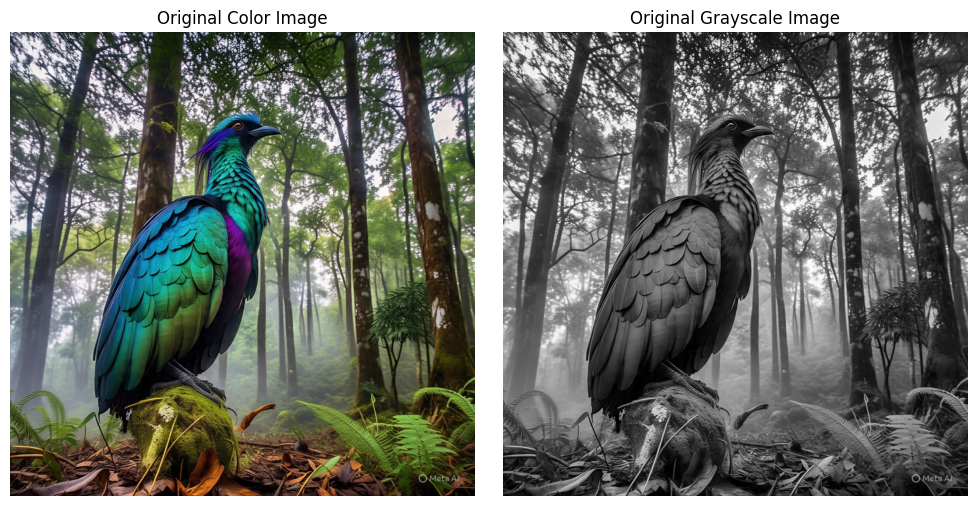

In [48]:
import cv2
import matplotlib.pyplot as plt

def show_two_images_horizontally(img1, title1, img2, title2, cmap1=None, cmap2='gray'):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap=cmap1)
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap=cmap2)
    plt.title(title2)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Load original image (color and grayscale)
image_path = 'image_assignment_1_CV.jpeg'
img_color = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# Convert BGR to RGB for proper color display
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Show color and grayscale images side by side
show_two_images_horizontally(img_rgb, 'Original Color Image', img_gray, 'Original Grayscale Image')



## Task 1: Intensity Level Reduction

Enter the number of intensity levels (power of 2, e.g., 2, 4, 8, ..., 256): 4


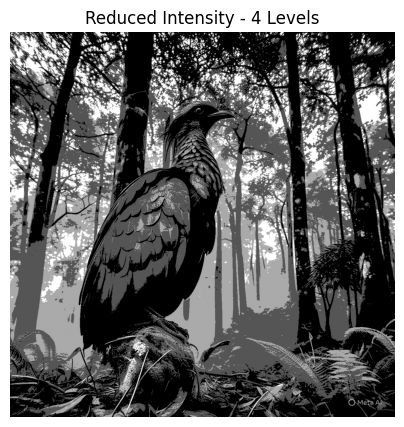

In [ ]:
def reduce_intensity_levels(img_gray, levels):
    factor = 256 // levels
    reduced = (img_gray // factor) * factor
    return reduced

# Get user input and validate it's a power of 2 between 2 and 256
while True:
    try:
        levels = int(input("Enter the number of intensity levels (power of 2, e.g., 2, 4, 8, ..., 256): "))
        if levels & (levels - 1) == 0 and 2 <= levels <= 256:
            break
        else:
            print("❌ Please enter a valid power of 2 between 2 and 256.")
    except ValueError:
        print("❌ Invalid input. Please enter an integer.")

# Apply intensity reduction
img_reduced = reduce_intensity_levels(img_gray, levels)
show_image(img_reduced, f'Reduced Intensity - {levels} Levels')


## Task 2: Spatial Averaging

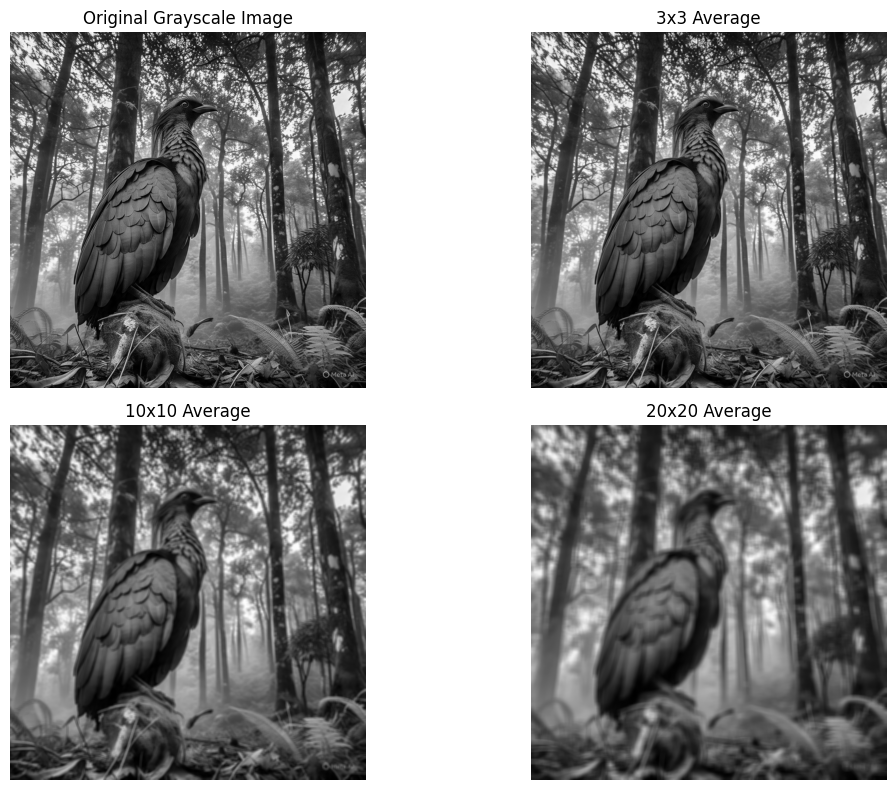

In [50]:
from PIL import Image
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

# Load image in grayscale mode ('L')
img = Image.open('image_assignment_1_CV.jpeg').convert('L')
img_array = np.array(img).astype(float)

# Define average kernels
kernel_3x3 = np.ones((3, 3)) / 9
kernel_10x10 = np.ones((10, 10)) / 100
kernel_20x20 = np.ones((20, 20)) / 400

# Function to apply convolution and clamp values
def apply_convolution_gray(img_arr, kernel):
    convolved = convolve(img_arr, kernel, mode='reflect')
    convolved = np.clip(convolved, 0, 255)
    return convolved.astype(np.uint8)

# Apply the kernels
avg_3x3 = apply_convolution_gray(img_array, kernel_3x3)
avg_10x10 = apply_convolution_gray(img_array, kernel_10x10)
avg_20x20 = apply_convolution_gray(img_array, kernel_20x20)

# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(img_array.astype(np.uint8), cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('3x3 Average')
plt.imshow(avg_3x3, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('10x10 Average')
plt.imshow(avg_10x10, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('20x20 Average')
plt.imshow(avg_20x20, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


## Task 3: Image Rotation

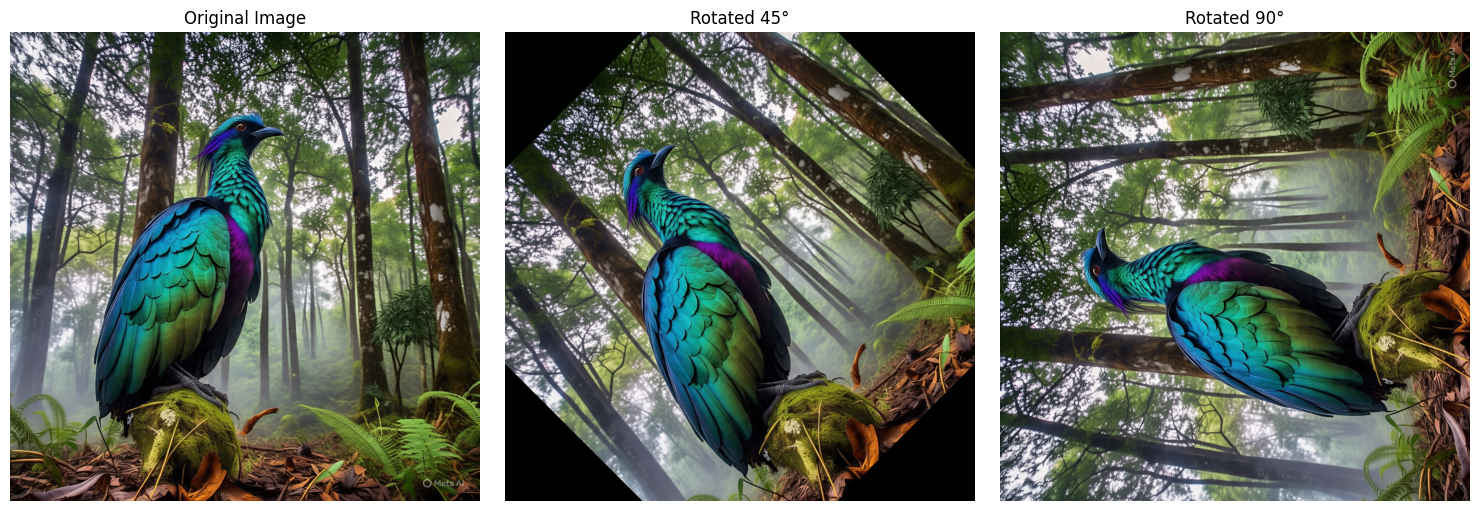

In [51]:
import matplotlib.pyplot as plt

def rotate_image(img_color, angle):
    (h, w) = img_color.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img_color, M, (w, h))
    return rotated

# Rotate by 45° and 90°
rotated_45 = rotate_image(img_color, 45)
rotated_90 = rotate_image(img_color, 90)

# Convert to RGB for correct display
original_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
rot_45_rgb = cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB)
rot_90_rgb = cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB)

# Plot side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(original_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(rot_45_rgb)
plt.title('Rotated 45°')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rot_90_rgb)
plt.title('Rotated 90°')
plt.axis('off')

plt.tight_layout()
plt.show()


## Task 4: Spatial Resolution Reduction

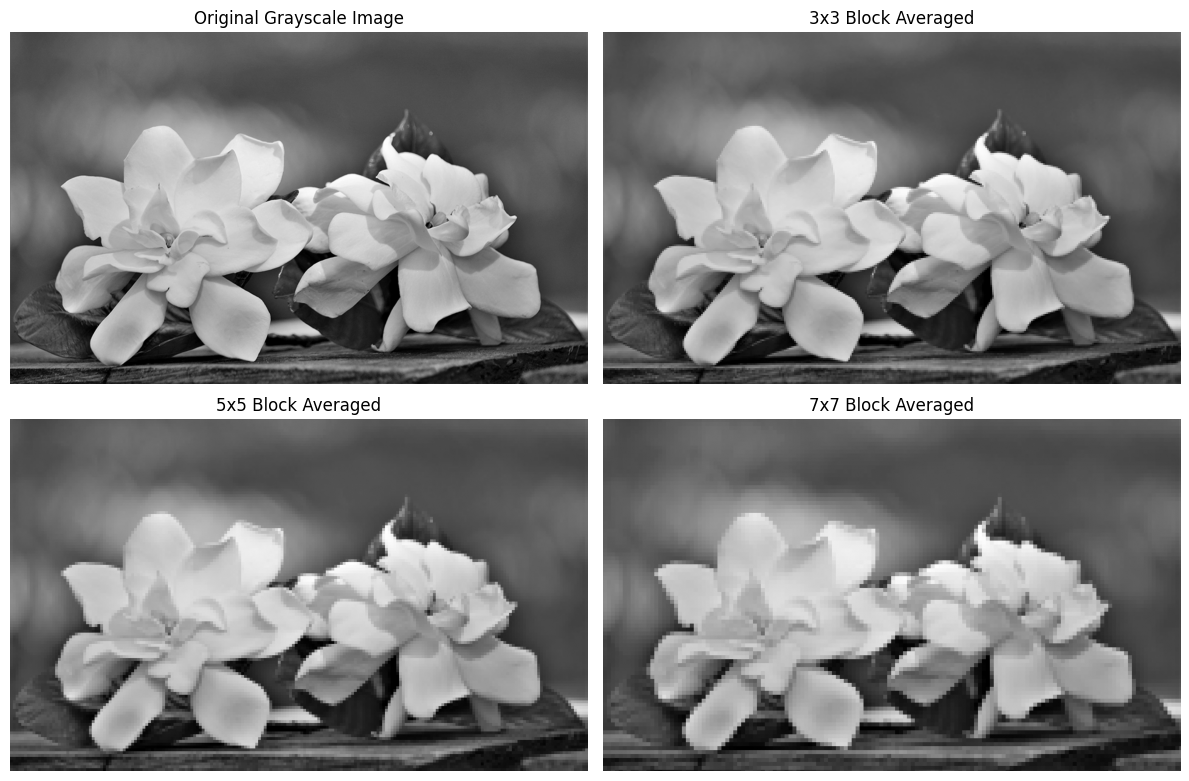

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the newly uploaded image
img_gray2 = cv2.imread('image2_assignment_1.jpeg', cv2.IMREAD_GRAYSCALE)

# Function to apply block averaging
def reduce_resolution(img_gray2, block_size):
    h, w = img_gray2.shape
    new_img = img_gray2.copy()

    for y in range(0, h, block_size):
        for x in range(0, w, block_size):
            block = img_gray2[y:y+block_size, x:x+block_size]
            avg = int(np.mean(block))
            new_img[y:y+block_size, x:x+block_size] = avg
    return new_img


# Apply for different block sizes
img_3x3 = reduce_resolution(img_gray2, 3)
img_5x5 = reduce_resolution(img_gray2, 5)
img_7x7 = reduce_resolution(img_gray2, 7)

# Display original and reduced-resolution images
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_gray2, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(img_3x3, cmap='gray')
plt.title('3x3 Block Averaged')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(img_5x5, cmap='gray')
plt.title('5x5 Block Averaged')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(img_7x7, cmap='gray')
plt.title('7x7 Block Averaged')
plt.axis('off')

plt.tight_layout()
plt.show()


